# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 6

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.




### Задача 1

Для критерия Вальда для проверки гипотез с $\mathsf{H}_0: \theta = \theta_0$ найдите мощность критерия, а также эквивалентный доверительный интервал для
- двустронней альтернативы (мощность была выведена на лекции)
- левосторонней альтернативы
- правосторонней альтернативы

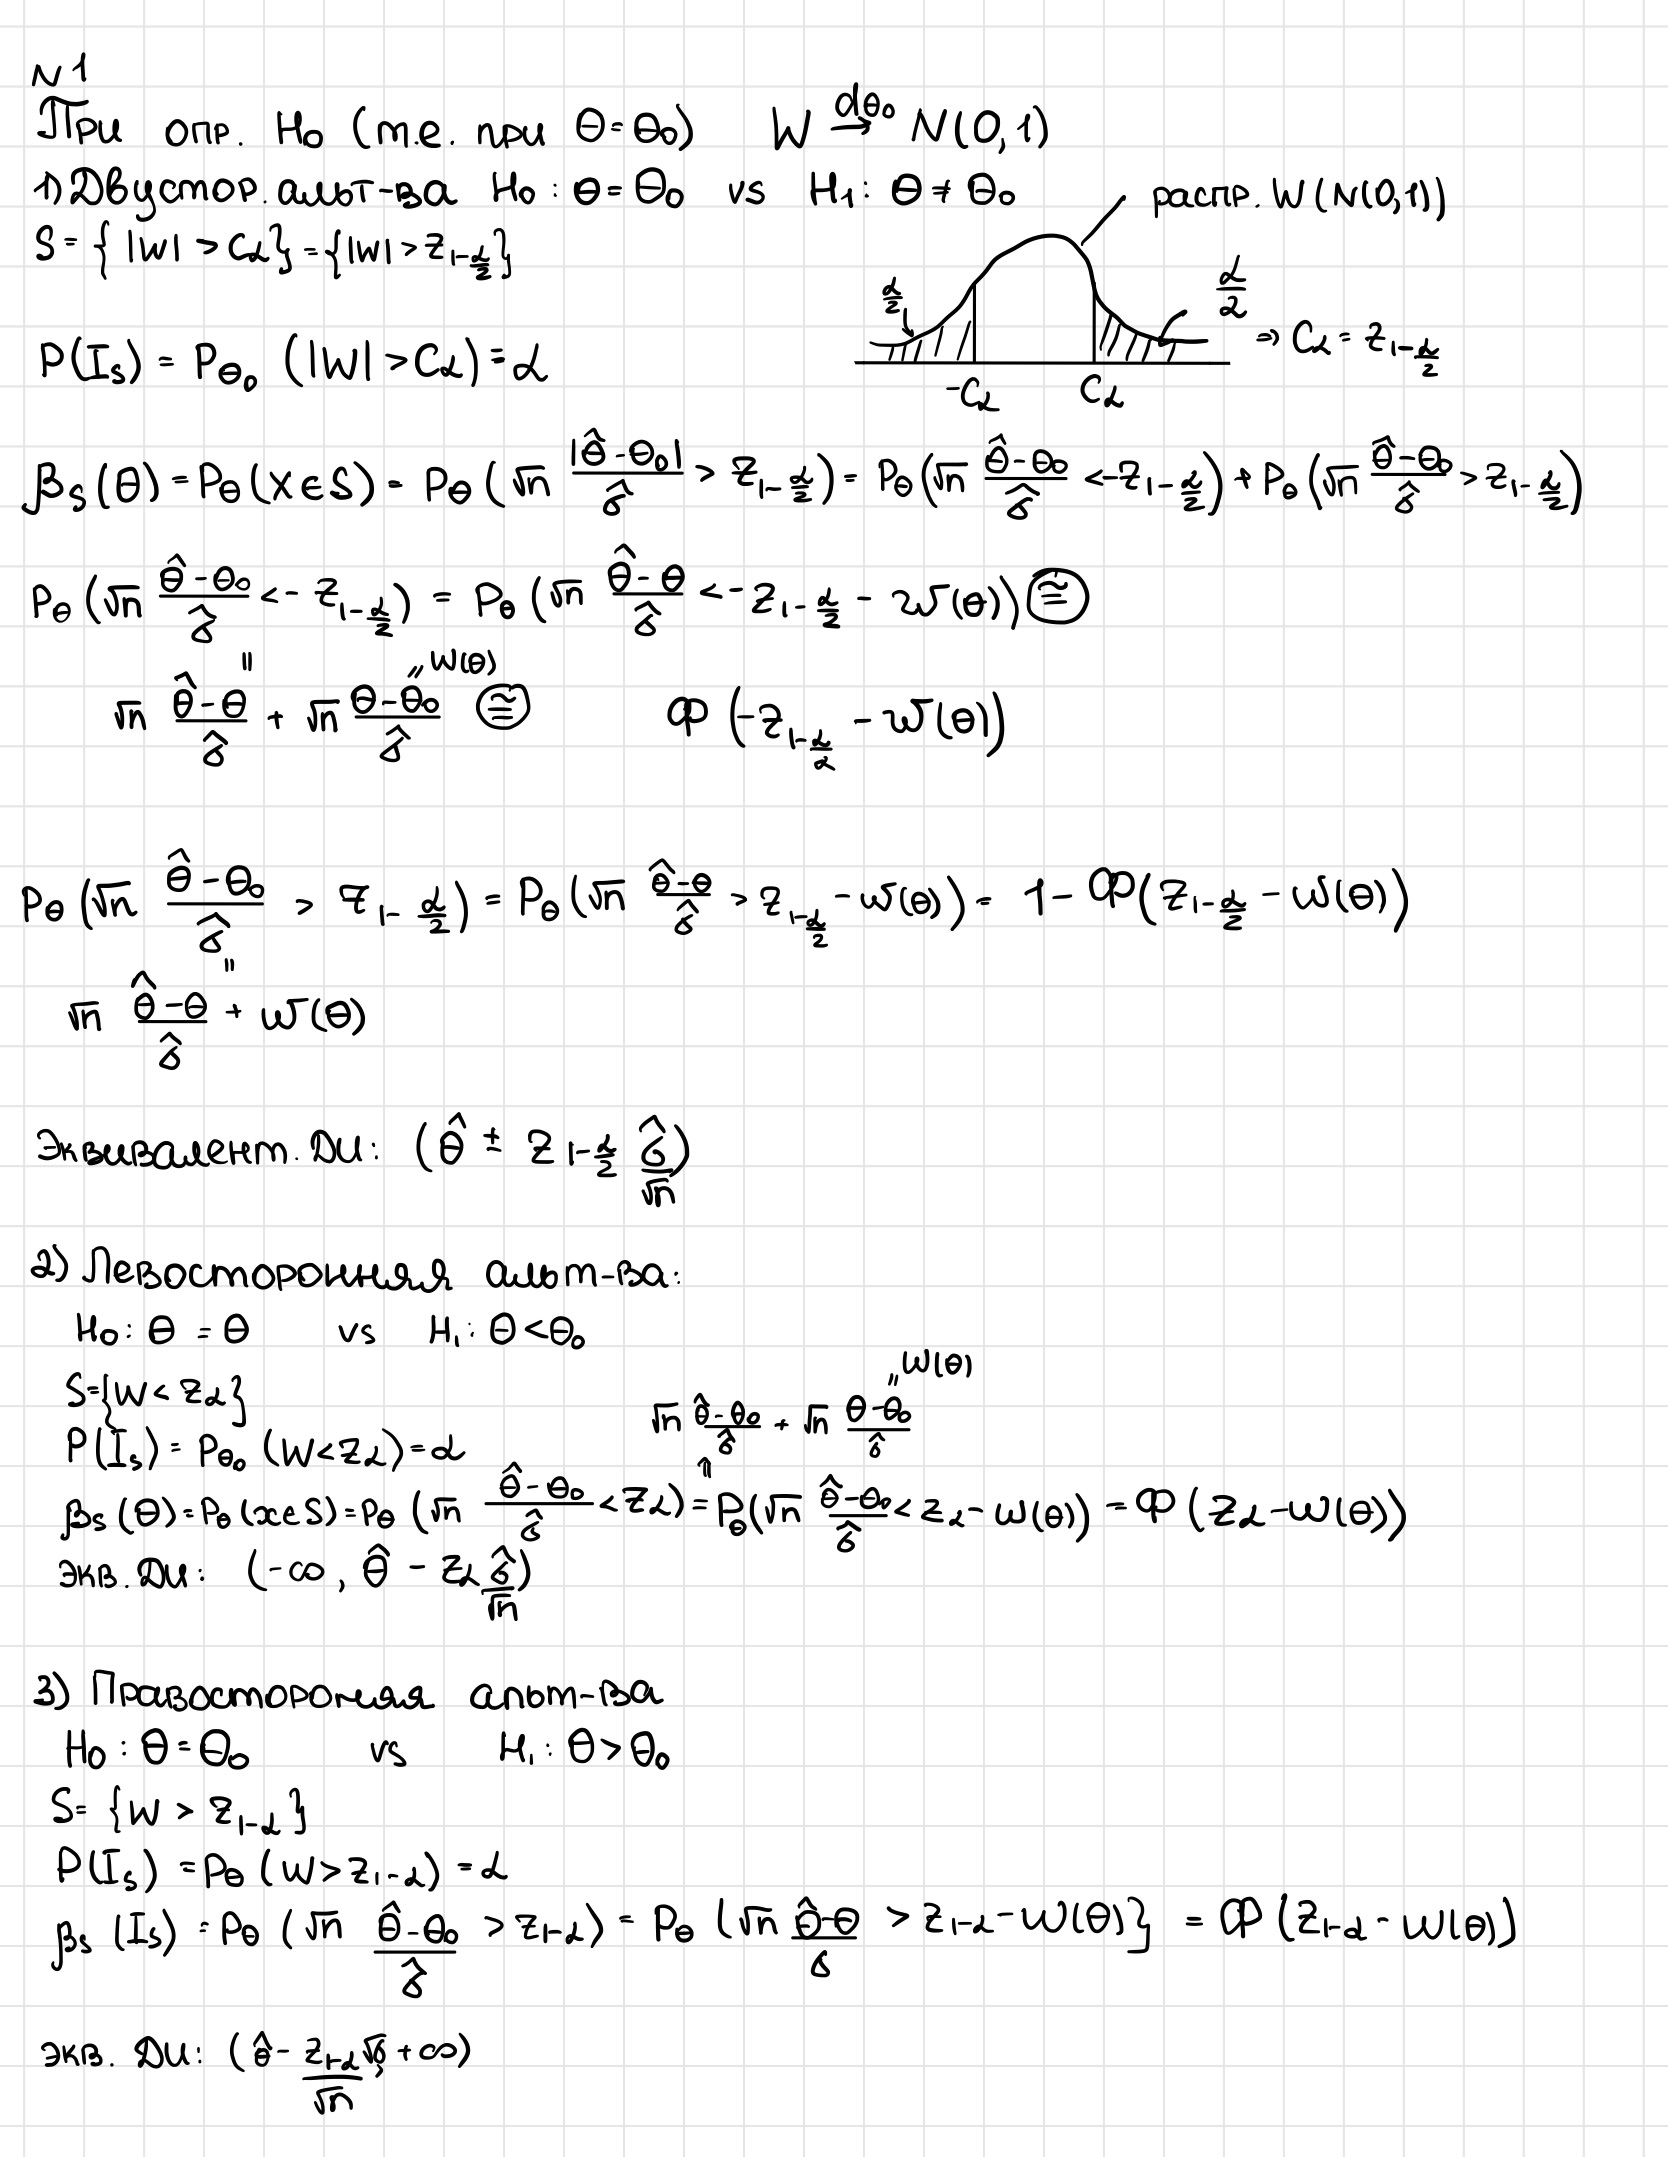

### Задача 2
 Пусть $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P} \in \{ \mathsf{P}_{\theta} | \theta \in \Theta \}$
и для проверки гипотез $\mathsf{H}_0 \colon \theta \in [−1, 1]$   vs.  $\mathsf{H}_1 \colon \theta \notin [−1, 1]$ используется критерий
$S = \{x \in \mathbb{R}^n | T(x) > 1\}$. Предположим, $T(x)$ имеет распределение $\mathcal{N}(\theta, 1)$. Какие
ответы возможны в результате проверки данных гипотез и в каких случаях? Найдите
вероятность ошибки первого рода.

*Указание:*
- Не забудьте, что в определении вероятности ошибки I рода стоит супремум по всем параметрам из основной гипотезы
- Можно показать, где достигается супремум графически. Например, с помощью `sps.norm`, где параметр `loc` отвечает за сдвиг.


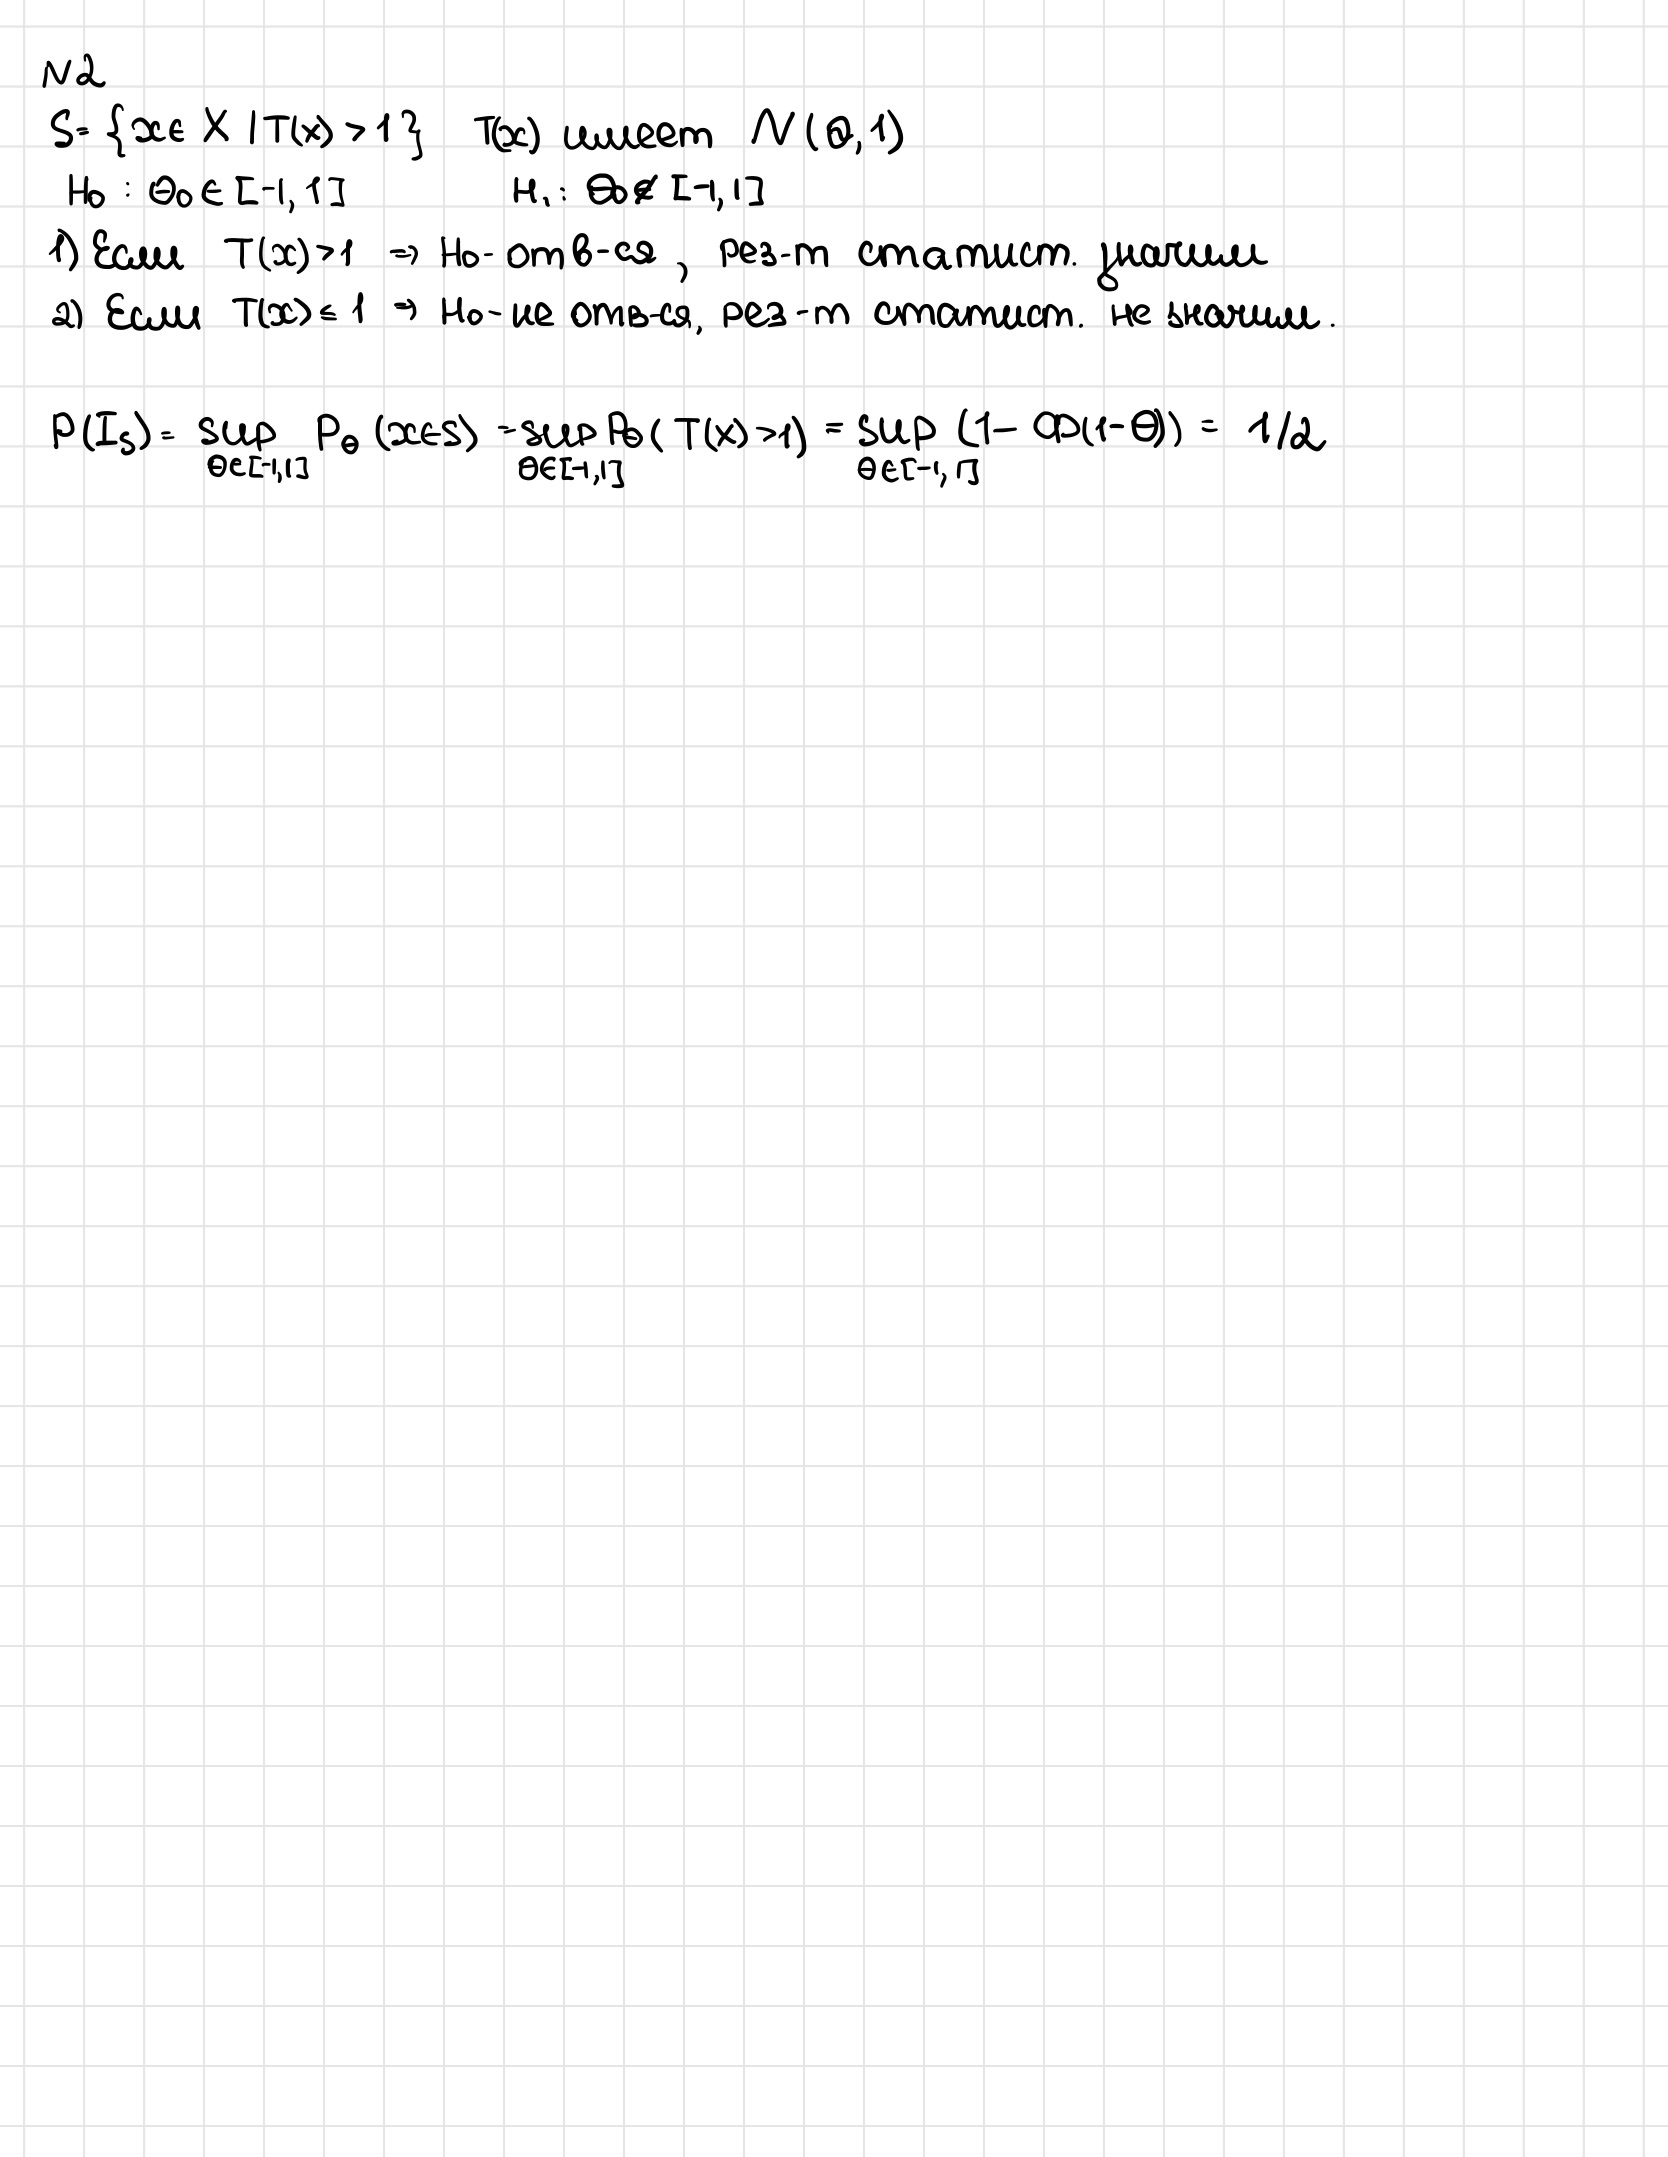

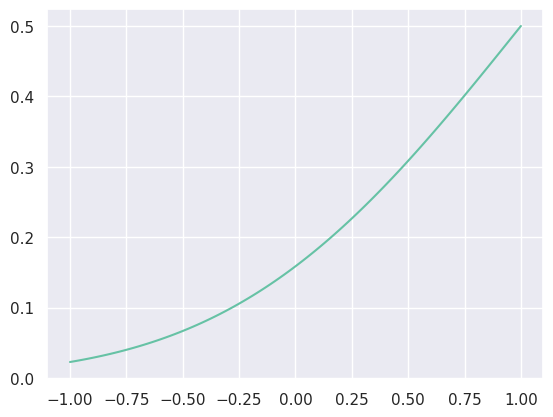

In [4]:
theta = np.linspace(-1, 1, 100)
plt.plot(theta, 1-sps.norm(loc=theta).cdf(1));

### Задача 3

Проведен эксперимент, получены данные из экспоненциального распределения. 

In [7]:
sample = [0.11731702, 0.75253036, 0.32918642, 0.22823564, 0.04240622,
        0.04239907, 0.01495969, 0.50280772, 0.22977054, 0.30781252,
        0.00519983, 0.87588937, 0.44660739, 0.05967191, 0.05016975,
        0.05065286, 0.09068843, 0.18598196, 0.14138427, 0.08605575,
        0.23659272, 0.03755863, 0.08637888, 0.1140693 , 0.15223367,
        0.384484  , 0.05568397, 0.18050729, 0.22437618, 0.01189096]

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ - выборка из распределения $Exp(\theta)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \theta = 2$ c правосторонней и левосторонней альтернативами.

In [10]:
alpha = 0.05
theta = 2

1. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала 

In [8]:
def wald_test(sample, theta, estimation_theta, estimation_sigma, alternative='two_sided'):
    """
    param sample: реализация выборки
    param theta: истинное значение параметра
    param estimation_theta: оценка параметра
    param estimation_sigma: оценка асимптотической дисперсии оценки estimation_sigma
    param alternative: вид альтернативной гипотезы, может принимать одно из значений 'two_sided', 'less', 'greater'

    return statistic
    return p_value
    return conf_int - доверительный интервал
    """

    n = len(sample)
    alpha = 0.05
    st_v = np.sqrt(n) * (estimation_theta - theta) / (estimation_sigma)
    
    if alternative == 'two_sided':
      z = sps.norm.ppf(1 - alpha/2)
      low = estimation_theta - z * estimation_sigma / np.sqrt(n)
      high = estimation_theta + z * estimation_sigma / np.sqrt(n)
      p_value = 2 * sps.norm.sf(abs(st_v))
      return st_v, p_value, (low, high)

    elif alternative == 'less':
      z = sps.norm.ppf(alpha)
      low = -np.inf
      high = estimation_theta - z * estimation_sigma / np.sqrt(n)
      p_value = sps.norm.cdf(st_v)
      return st_v, p_value, (low, high)

    elif alternative == 'greater':
      z = sps.norm.ppf(1 - alpha)
      low = estimation_theta - z * estimation_sigma / np.sqrt(n)
      high = np.inf
      p_value = sps.norm.sf(st_v)
      return st_v, p_value, (low, high)

2. Проверьте гипотезу с правосторонней альтернативой.

In [11]:
st_v_r, p_value_r, (low_r, high_r) = wald_test(sample, theta, 1/np.mean(sample), np.mean(sample), alternative='greater')
st_v_r > sps.norm.ppf(1 - alpha), p_value_r, (low_r, high_r)


(True, 0.0, (4.903511983320262, inf))

**Вывод:** Нулевая гипотеза отвергается в правосторонней альтернативе в пользу альтернативной гипотезы: $\lambda>2$

3. Проверьте гипотезу с левосторонней альтернативой.

In [13]:
st_v_l, p_value_l, (low_l, high_l) = wald_test(sample, theta, 1/np.mean(sample), np.mean(sample), alternative='less')
st_v_l < sps.norm.ppf(alpha), p_value_l, (low_l, high_l)



(False, 1.0, (-inf, 5.02450604712537))

**Вывод:** Нулевая гипотеза не отвергается в случае левосторонней альтернативы. p-value- это мин.уровень значимости, при котором нулевая гипотеща еще м.б. отвергнута. В данном случае p_value больше заданного уровня alpha, это означает, что данные не обеспечивают достаточных доказательств в пользу отвержения нулевой гипотезы.



### Задача 4

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем не редко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью семплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.

**Ответ:** 
1)Сгенерировать большое число $N$ выборок $X_1^{(i)}, ..., X_n^{(i)}$ из распределения $\mathsf{P}_0$.
2)Посчитать долю отвержения гипотезы - реальнф уровень с погрешностью $1/\sqrt{N}$


Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

**Ответ:** Выполнить шаги, описанные выше, генерируя из распределения $\mathscr{P}_1$ и посчитать долю отвержения гипотезы

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для $ n = 50$.

In [18]:
theta = 1
alpha = 0.05
count = 100000
sample = sps.poisson(mu=theta).rvs(size=(count, 50))

z = sps.poisson(mu=theta).ppf(1 - alpha/2)
estimation_theta = np.mean(sample, axis=1)
estimation_sigma = estimation_theta

value = 0
for i in range(count):
  st_v, p_value, (low, high) = wald_test(sample, theta, estimation_theta[i], estimation_sigma[i], alternative='two_sided')

  if np.abs(st_v) > z:
    value += 1

value/count


0.94424

**Вывод:** Получили очень большое значение реального уровня значимости, т.е можно сделать вывод, что при маленьком размере выборки высока вероятность ощибки первого рода

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta=0.2$ и при $\theta=2$.

In [20]:
thetas = [0.2, 2]
alpha = 0.05
count = 10000
sample = sps.poisson(mu=theta).rvs(size=(count, 50))

z_two = sps.poisson(mu=theta).ppf(1-alpha/2)
z_l = sps.poisson(mu=theta).ppf(alpha)
z_r = sps.poisson(mu=theta).ppf(1-alpha)

estimation_theta = np.mean(sample, axis=1)
estimation_sigma = estimation_theta

for theta in thetas: 
  value_two = 0
  value_l = 0
  value_r = 0
  for i in range(count):
    st_v, p_value, (low, high) = wald_test(sample, theta, estimation_theta[i], estimation_sigma[i])

    if np.abs(st_v) > z_two:
      value_two += 1

    if st_v < z_l:
      value_l += 1
    
    if st_v > z_r:
      value_r += 1

  print(theta, f'Двусторонняя альт-ва: {value_two / count}', 
        f'Левосторонняя альт-ва:{value_l / count}', 
        f'Правосторонняя альт-ва:{value_r / count}')




0.2 Двусторонняя альт-ва: 1.0 Левосторонняя альт-ва:0.0 Правосторонняя альт-ва:1.0
2 Двусторонняя альт-ва: 0.6243 Левосторонняя альт-ва:0.4933 Правосторонняя альт-ва:0.2888


**Вывод:** В случае, когда $\theta=0.2$ можно сказать, что значение больше 0.2, так как при правосторонней и двусторонней альт-х нулевая гипотеза отвергается. 
В случае $\theta=2$, сложно утверждать, но, скорее всего, значение параметра близко к 2.



### Задача 5

**Профиль биология**

Испытывается эффективность препарата, понижающего температуру. Каждому пациенту измеряют температуру до и после приема препарата. В результате разность температур для испытуемых получилась равной: 


In [21]:
a_sample = [1.19, 0.84, 1.3, 0.76, 0.99, 1.3, 0.97, 0.91, 0.97, 0.99, 1.18, 0.93, 0.84, 1.07, 0.95,
     1.01, 1.04, 0.84, 1.0, 1.19, 1.31, 0.97, 1.1, 0.86, 1.02, 0.95, 0.93, 0.84, 0.85, 0.78]

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. С помощью критерия Вальда проверьте гипотезу: $\mathsf{H}_0 \colon a=0$ vs. $\mathsf{H}_1 \colon a > 0$.

In [23]:
theta = 0
estimation_a = np.mean(a_sample)
estimation_sigma = np.var(a_sample)
st_v, p_value, (low, high) = wald_test(a_sample, theta, estimation_a, estimation_sigma, alternative='greater')
print(st_v > sps.norm.ppf(1-alpha), p_value, (low, high))

True 0.0 (0.9892578894208138, inf)


**Вывод:** Это означает, что нулевая гипотеза $\mathsf{H}_0 \colon a=0$ может быть отвергнута на уровне значимости 0.05 в пользу альтернативной гипотезы $\mathsf{H}_1 \colon a > 0$. Значит, препарат эффективен в понижении температуры